## Problema 1

Probabilidad de error para tres poblaciones poisson de la misma proporcion y de parametros $\lambda_1 =10$, $\lambda_2 =15$ 
y $\lambda_3 =20$ respectivamente. 


In [1]:
lambdas <- c(10, 15, 20)


In [2]:
# Nuestro clasificador
g <- function(k) {
  if (0 <= k && k <= 12) {
    1
  } else if (13 <= k && k <= 17) {
    2
  } else if (18 <= k) {
    3
  }
}

# cuenta el numero de errores de clasificacion dado
testLambda <- function(lambda, size) {
  pob <- rpois(size, lambda = lambda)
  mismatches <- lambdas[pob |> sapply(g)] != lambda
  sum(mismatches)
}

# proporción total de error.
error <- function(size) {
  err <- lambdas |>
    sapply(\(lambda) {
      testLambda(lambda, size)
    }) |>
    sum()
  err / (3 * size)
}


In [3]:
# podemos calcular el error para un tamaño de población considerable
size <- 100000
error(size)


[1] 0.34116

## Problema 2

Clasificador de vinos usando el clasificador ingenuo de Bayes
suponiendo que cada 

In [4]:
library(graphics)

In [5]:
attributes <- "1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
  12)OD280/OD315 of diluted wines
 	13)Proline" |>
  gsub("[0-9]+\\)\\s*", "", x = _) |>
  strsplit("\\n|\\t") |>
  unlist()

attributes <- attributes[attributes != "" & attributes != " "]

In [6]:

wine <- read.csv(file = "./Tareas/Tarea-1/wine.data", header = FALSE)


In [7]:
names(wine) = c("class", attributes)

wine

class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045


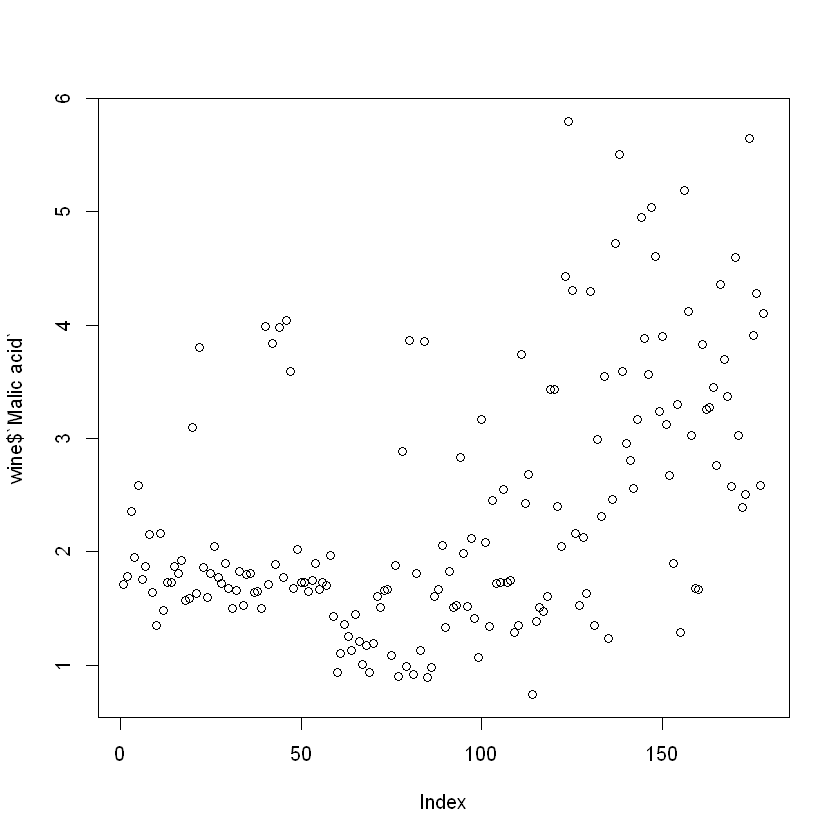

In [8]:
plot(wine$`Malic acid`)


In [9]:
normal_likelihood <- function(x, mu, sig) {
  dnorm(x, mean = mu, sd = sig)
}

naive_bayes_gaussian <- function(X, y) {
  classes <- unique(y)
  n_features <- ncol(X)

  mean_list <- list()
  var_list <- list()
  prob_inclusion <- list()

  for (c in classes) {
    X_c <- X[y == c, ]
    mean_list[[as.character(c)]] <- colMeans(X_c)
    var_list[[as.character(c)]] <- apply(X = X_c, MARGIN = 2, var)
    prob_inclusion[[as.character(c)]] <- nrow(X_c) / nrow(X)
  }

  list(mean = mean_list, var = var_list, probs_inc = prob_inclusion, classes = classes)
}

predict_naive_bayes <- function(model, X) {
  predictions <- apply(X, 1, function(x) {
    posteriors <- sapply(model$classes, function(c) {
      prob_inc <- log(model$probs_inc[[as.character(c)]])
      likelihood <- sum(log(normal_likelihood(x, model$mean[[as.character(c)]], model$var[[as.character(c)]])))
      return(prob_inc + likelihood)
    })
    model$classes[which.max(posteriors)]
  })
  predictions
}


In [37]:
# summary(wine)
X = wine[attributes]
y = wine$class

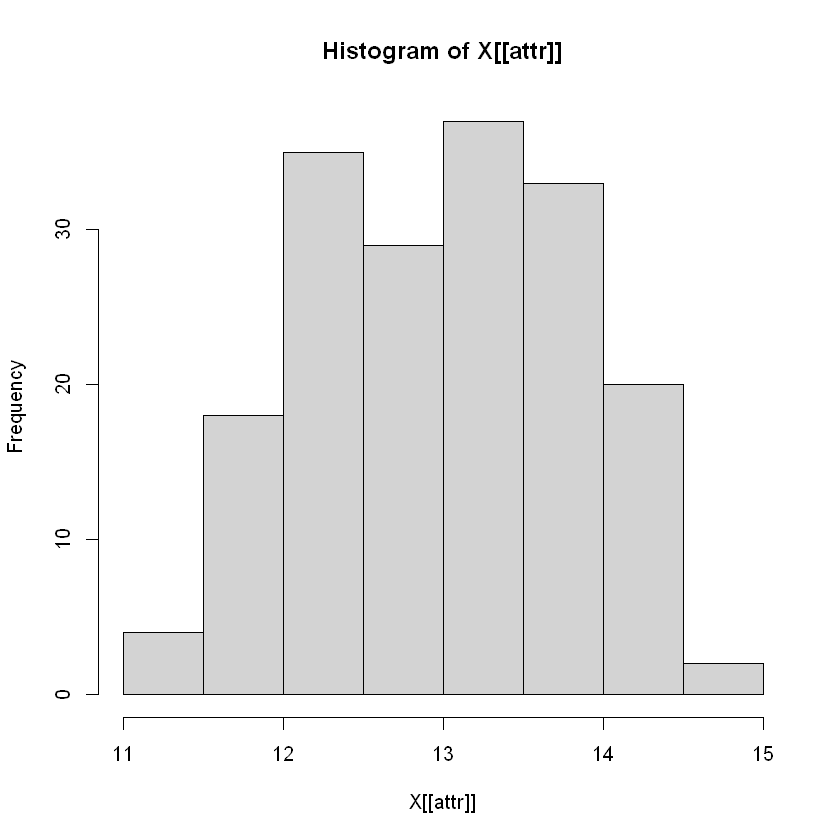

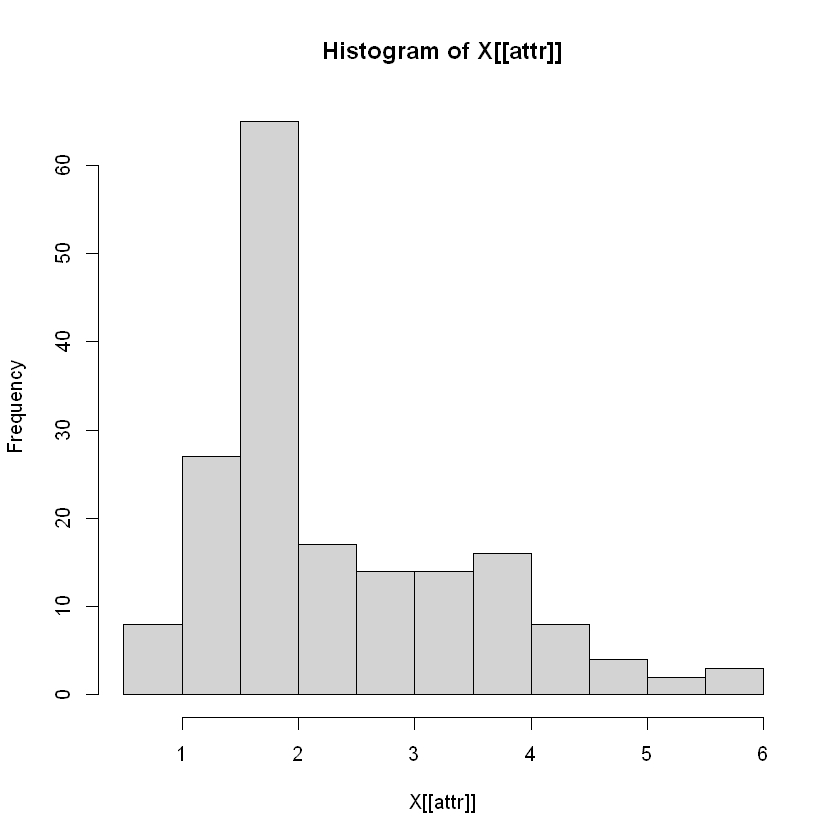

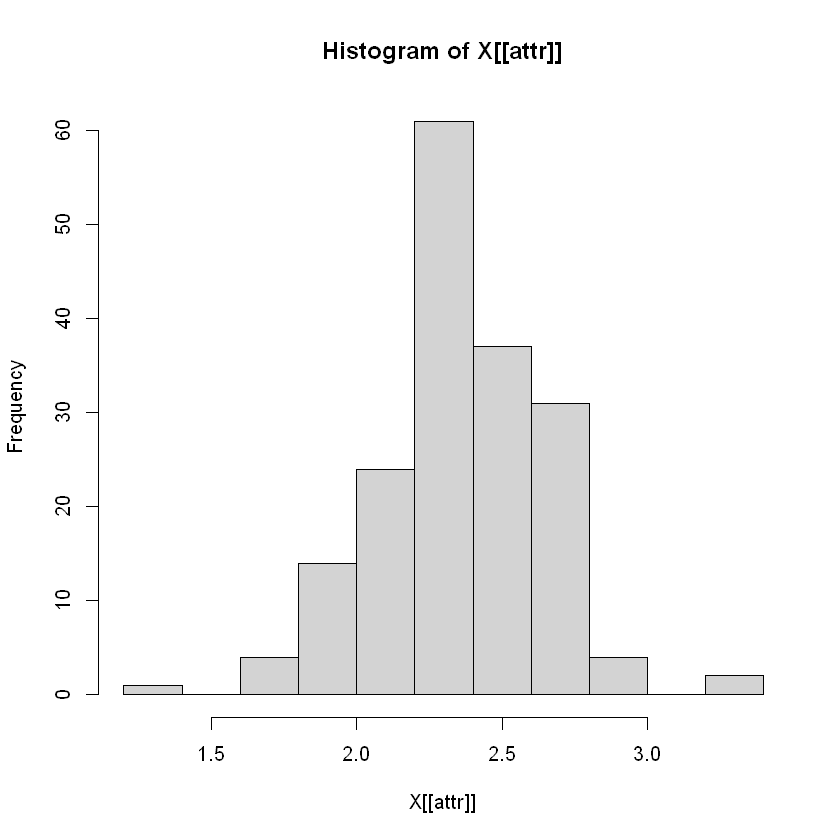

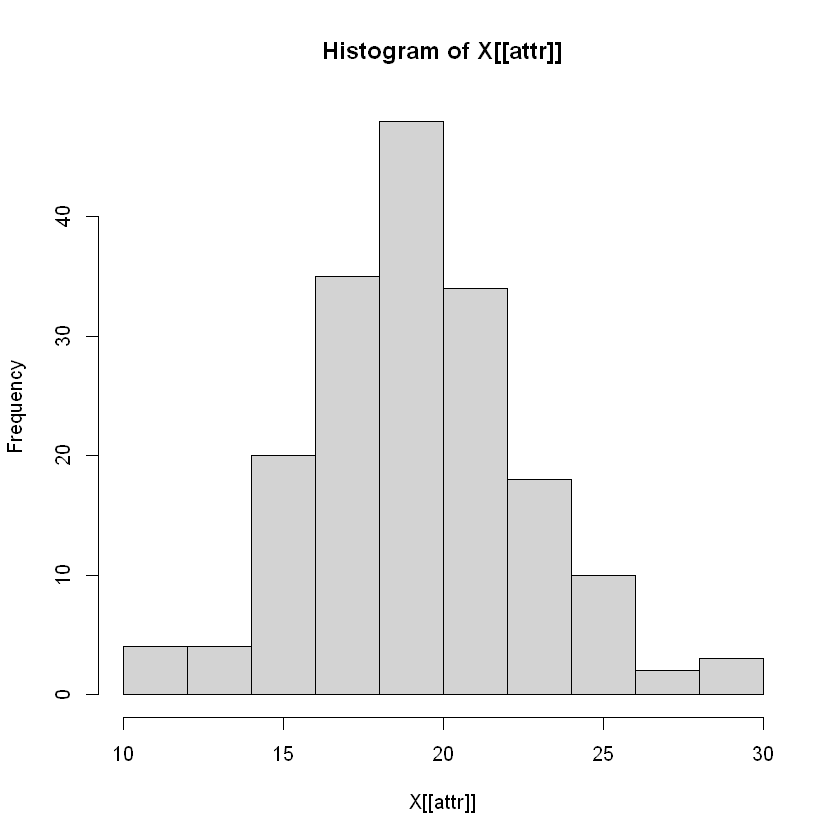

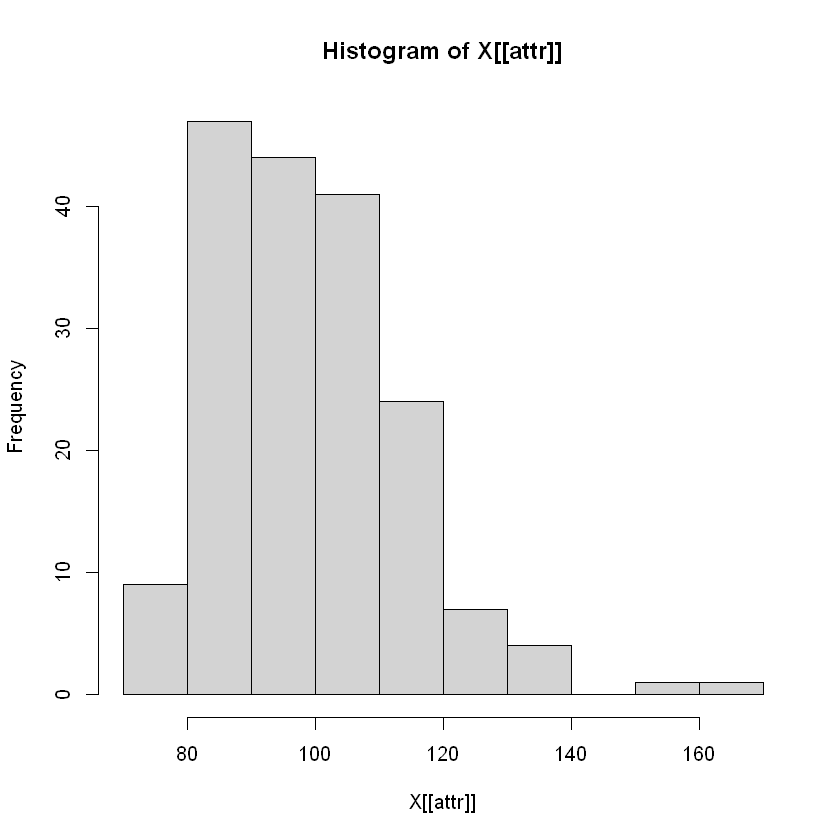

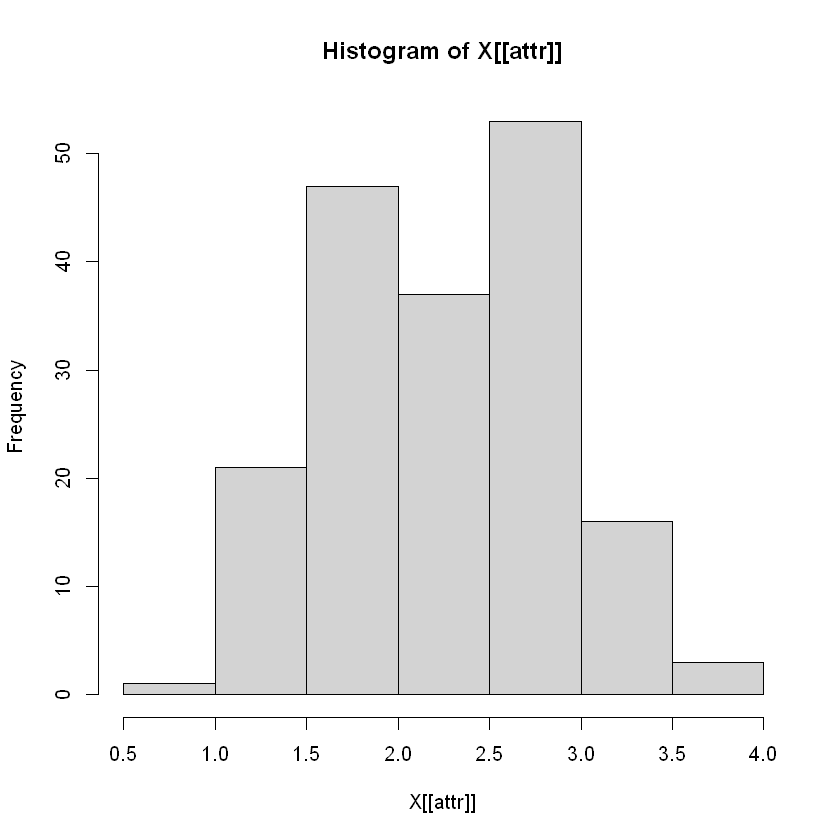

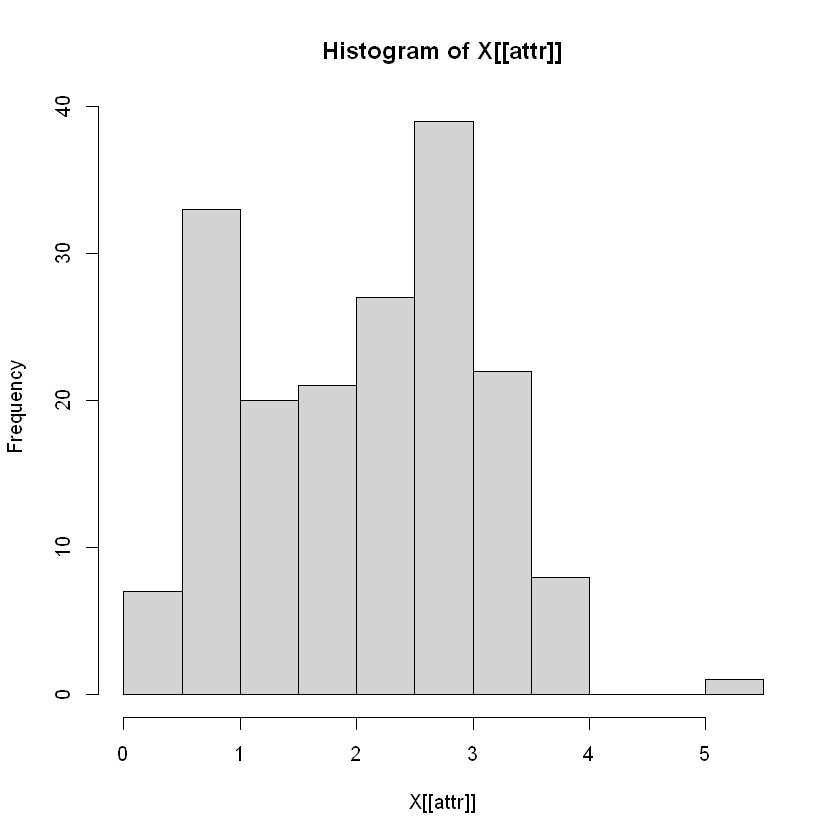

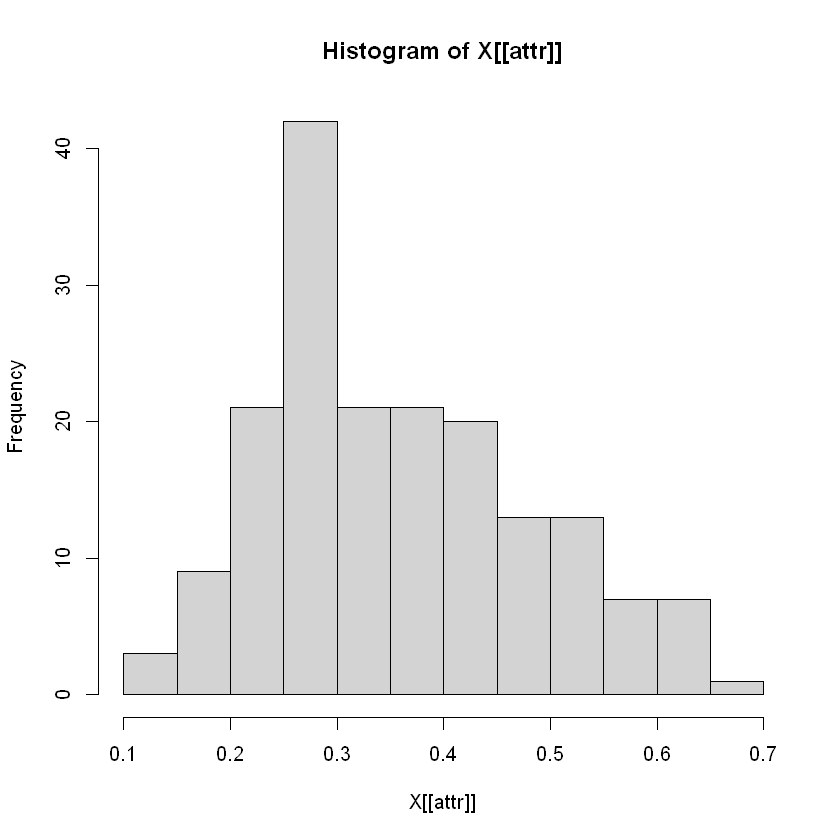

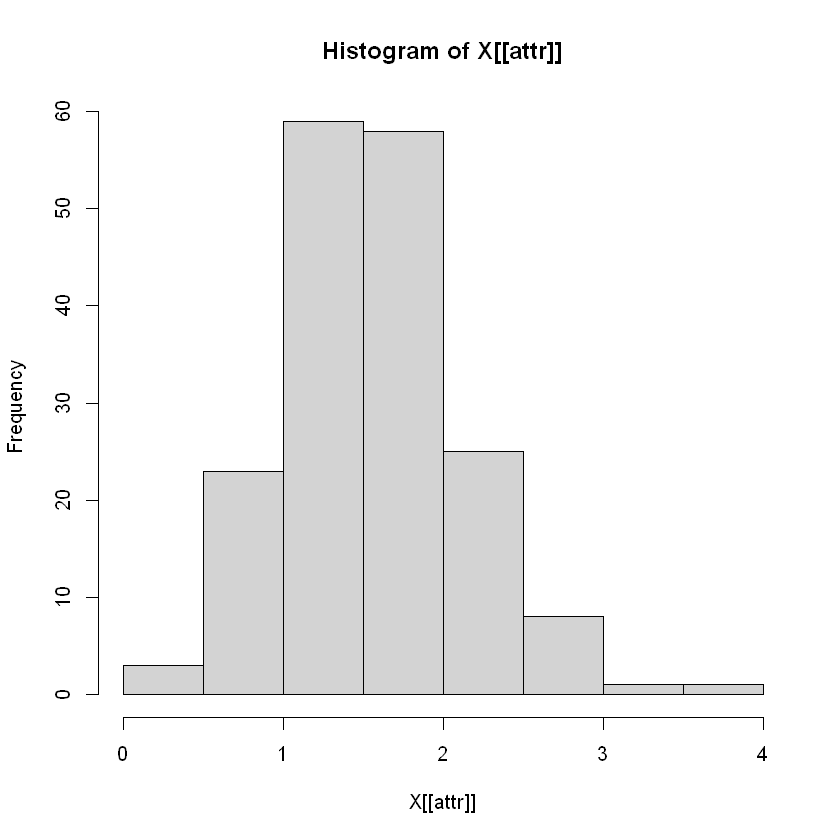

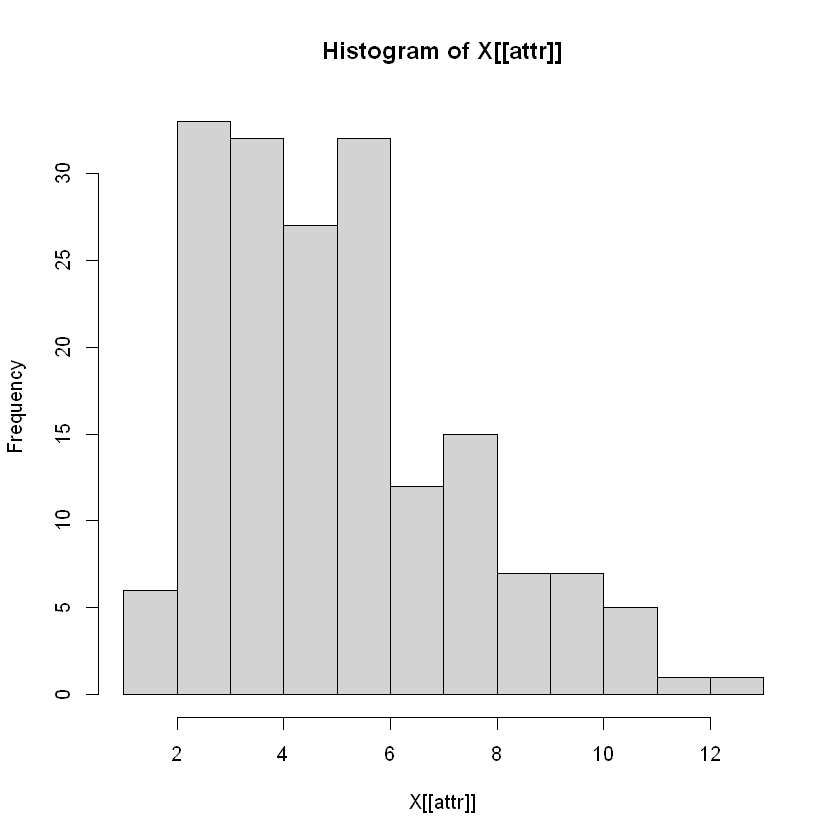

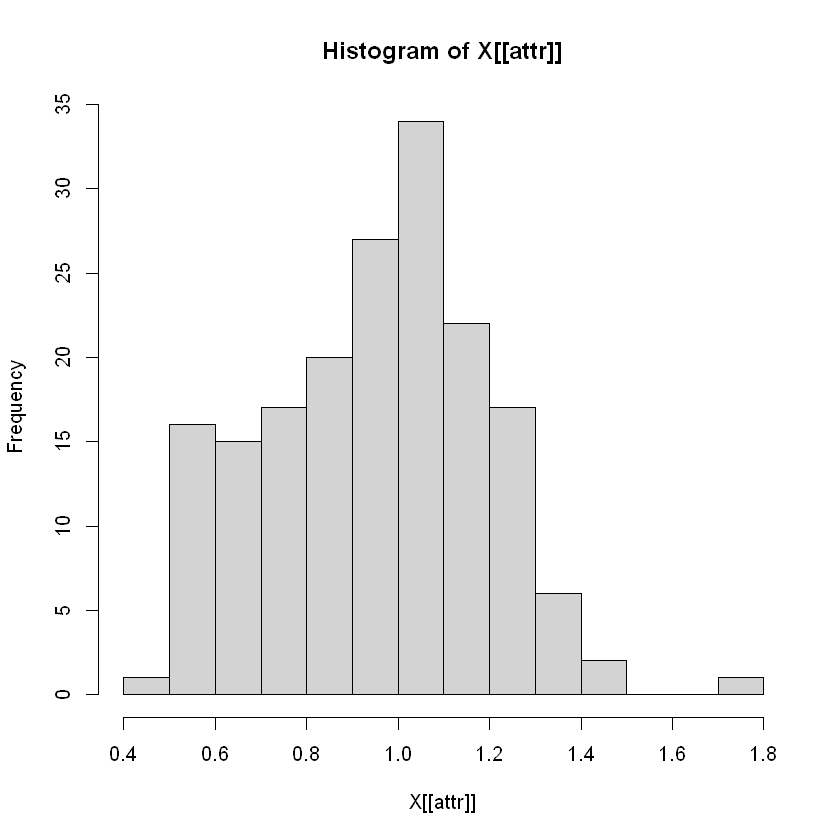

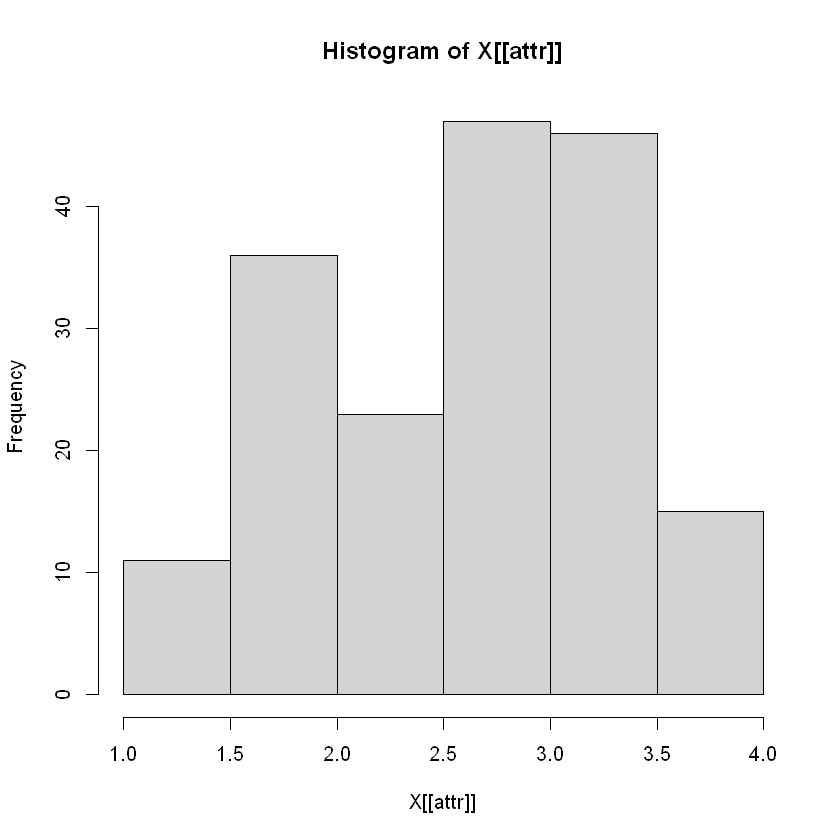

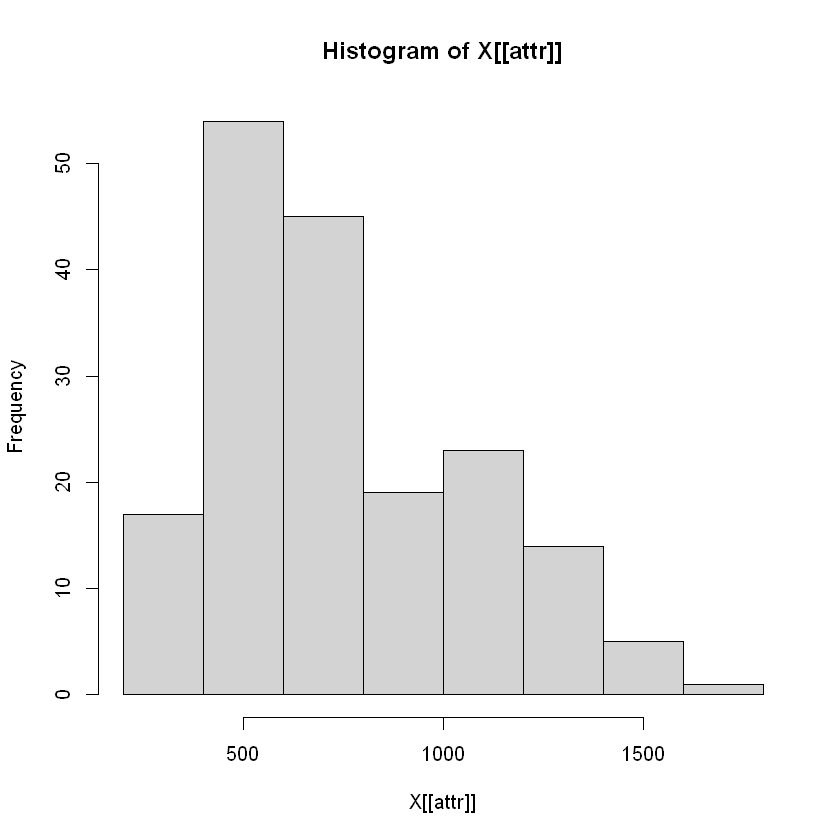

In [74]:
# ploteamos el histograma de cada columna de atributos para darnos una idea de
# ls distribución de los datos.

for (attr in attributes) {
  hist(X[[attr]])
}


In [11]:
# normalize data
min_max_normalize <- function(x) {
  return((x - min(x)) / (max(x) - min(x)))
}


In [19]:
X <- as.data.frame(lapply(wine, min_max_normalize))
y = min_max_normalize(y)

In [20]:
model = naive_bayes_gaussian(X, y)
model

$mean
$mean$`0`
                          class                         Alcohol 
                      0.0000000                       0.7144068 
                     Malic.acid                             Ash 
                      0.2511221                       0.5858787 
              Alcalinity.of.ash                       Magnesium 
                      0.3318190                       0.3949889 
                  Total.phenols                      Flavanoids 
                      0.6414378                       0.5574626 
           Nonflavanoid.phenols                 Proanthocyanins 
                      0.3018868                       0.4698177 
                Color.intensity                             Hue 
                      0.3624834                       0.4731983 
X..OD280.OD315.of.diluted.wines                         Proline 
                      0.6915006                       0.5975120 

$mean$`0.5`
                          class                         Alcohol 
                      0.5000000                       0.3286138 
                     Malic.acid                             Ash 
                      0.2357067                       0.4731491 
              Alcalinity.of.ash                       Magnesium 
                      0.4968056                       0.2668402 
                  Total.phenols                      Flavanoids 
                      0.4409908                       0.3672669 
           Nonflavanoid.phenols                 Proanthocyanins 
                      0.4408716                       0.3849469 
                Color.intensity                             Hue 
                      0.1541484                       0.4685217 
X..OD280.OD315.of.diluted.wines                         Proline 
                      0.5550740                       0.1722589 

$mean$`1`
                          class                         Alcohol 
                     1.00000000                      0.55888158 
                     Malic.acid                             Ash 
                     0.51259881                      0.57598039 
              Alcalinity.of.ash                       Magnesium 
                     0.55756014                      0.31861413 
                  Total.phenols                      Flavanoids 
                     0.24094828                      0.09313467 
           Nonflavanoid.phenols                 Proanthocyanins 
                     0.59905660                      0.23455573 
                Color.intensity                             Hue 
                     0.52186433                      0.16480352 
X..OD280.OD315.of.diluted.wines                         Proline 
                     0.15148046                      0.25099560 


$var
$var$`0`
                          class                         Alcohol 
                    0.000000000                     0.014789463 
                     Malic.acid                             Ash 
                    0.018516909                     0.014757180 
              Alcalinity.of.ash                       Magnesium 
                    0.017227543                     0.013023149 
                  Total.phenols                      Flavanoids 
                    0.013661688                     0.007032401 
           Nonflavanoid.phenols                 Proanthocyanins 
                    0.017468482                     0.016900757 
                Color.intensity                             Hue 
                    0.011168320                     0.008968343 
X..OD280.OD315.of.diluted.wines                         Proline 
                    0.017107929                     0.024965074 

$var$`0.5`
                          class                         Alcohol 
                    0.000000000                     0.020041933 
                     Malic.acid                             Ash 
                    0.040282612                     0.028459378 
              Alcalinity.of.ash 

In [21]:
pre <- predict_naive_bayes(model, X)
pre

[1] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [19] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [37] 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 [55] 0.0 0.0 0.0 0.0 0.0 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 [73] 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 [91] 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
[109] 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.0 0.5 0.5 0.5 0.5
[127] 0.5 0.5 0.5 0.5 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
[145] 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
[163] 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0

In [22]:
sum(pre != y)

[1] 2